In [42]:
# --- 1. Import Libraries ที่จำเป็น ---
# นำเข้าไลบรารีที่จำเป็นทั้งหมด

import pandas as pd  # สำหรับจัดการข้อมูลตาราง (DataFrame)
import numpy as np  # สำหรับการคำนวณทางคณิตศาสตร์
import matplotlib.pyplot as plt  # สำหรับสร้างกราฟพื้นฐาน
import seaborn as sns  # สำหรับสร้างกราฟสถิติที่สวยงาม

# ส่วนของ sklearn
from sklearn.model_selection import train_test_split, GridSearchCV  # แบ่งข้อมูล
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # ปรับสเกล, แปลง categorical
from sklearn.compose import ColumnTransformer  # รวมขั้นตอน preprocessing
from sklearn.pipeline import Pipeline  # สร้างท่อการทำงาน  ช่วยลดความซับซ้อนของโค้ดและลดโอกาสเกิดข้อผิดพลาด

# โมเดลที่จะใช้เปรียบเทียบ
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# เครื่องมือวัดผล
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [43]:
# --- 2. การโหลดข้อมูล (Load Data) ---

# กำหนดที่อยู่ของไฟล์ข้อมูล
data_path = 'Customer-Churn-Records.csv'
# อ่านไฟล์ CSV ด้วย Pandas
try:
    df = pd.read_csv(data_path)
    print("--- โหลดข้อมูล Customer-Churn-Records.csv สำเร็จ ---") #ยืนยันการโหลด
except FileNotFoundError:
    print(f"--- ไม่พบไฟล์ {data_path} กรุณาตรวจสอบว่าไฟล์อยู่ในตำแหน่งที่ถูกต้อง ---") #อธิบายได้ว่า Error เพระาอะไร
    exit()

--- โหลดข้อมูล Customer-Churn-Records.csv สำเร็จ ---


In [44]:
# --- 3. การสำรวจข้อมูล (Exploratory Data Analysis - EDA) ---

#3.1 ข้อมูลพื้นฐาน (Info & Describe)

In [45]:
# แสดงข้อมูล 5 แถวแรก
print("\n--- Head ---")
print(df.head())


--- Head ---
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1   

In [46]:
# แสดงข้อมูลพื้นฐาน (ชนิดข้อมูล, จำนวนข้อมูล)
print("\n--- Info ---")
df.info()


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int6

In [47]:
# ตรวจสอบค่าว่าง (Missing Values)
print("\n--- Missing Values ---")
print(df.isnull().sum())
# (ผลลัพธ์: ข้อมูลชุดนี้ไม่มีค่าว่าง)


--- Missing Values ---
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [48]:
# แสดงสถิติเชิงพรรณนา (Min, Max, Mean)
print("\n--- Describe (Numerical) ---")
print(df.describe())


--- Describe (Numerical) ---
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.49979

In [49]:
# --- 3.2 การแสดงผลด้วยกราฟ (Data Visualization) ---
print("\n--- 3.2 เริ่มสร้างกราฟ (EDA Visualization) ---")
# ตั้งค่าสไตล์ของกราฟ
sns.set_style("whitegrid")


--- 3.2 เริ่มสร้างกราฟ (EDA Visualization) ---


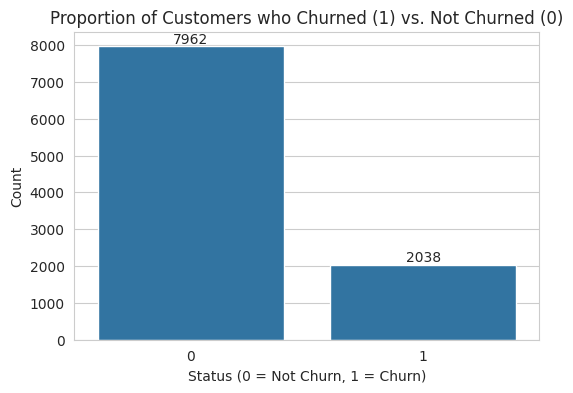

In [50]:
# กราฟที่ 1: สัดส่วนของ Target (Exited)
# (เพื่อดูว่าข้อมูล Imbalanced หรือไม่)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=df)
plt.title('Proportion of Customers who Churned (1) vs. Not Churned (0)')
plt.xlabel('Status (0 = Not Churn, 1 = Churn)')
plt.ylabel('Count')
# วนลูป ax.patches (ซึ่งคือแท่งสี่เหลี่ยมแต่ละแท่งในกราฟ)
for p in ax.patches:
    # p.get_height() คือความสูงของแท่ง (ค่า Count)
    height = p.get_height()
    # ax.annotate คือคำสั่งเพิ่มข้อความ
    ax.annotate(
        f'{height:.0f}',  # ข้อความที่จะแสดง (จัดรูปแบบเป็นเลขจำนวนเต็ม)
        (p.get_x() + p.get_width() / 2., height),  # ตำแหน่ง (x, y) ที่จะแสดง (x=กึ่งกลางแท่ง, y=บนสุดของแท่ง)
        ha='center', va='center',  # จัดตำแหน่งข้อความให้อยู่กึ่งกลาง
        xytext=(0, 5),  # ระยะห่างจากจุด (x, y) (ให้ข้อความอยู่เหนือแท่ง 5 points)
        textcoords='offset points'
    )
plt.show()

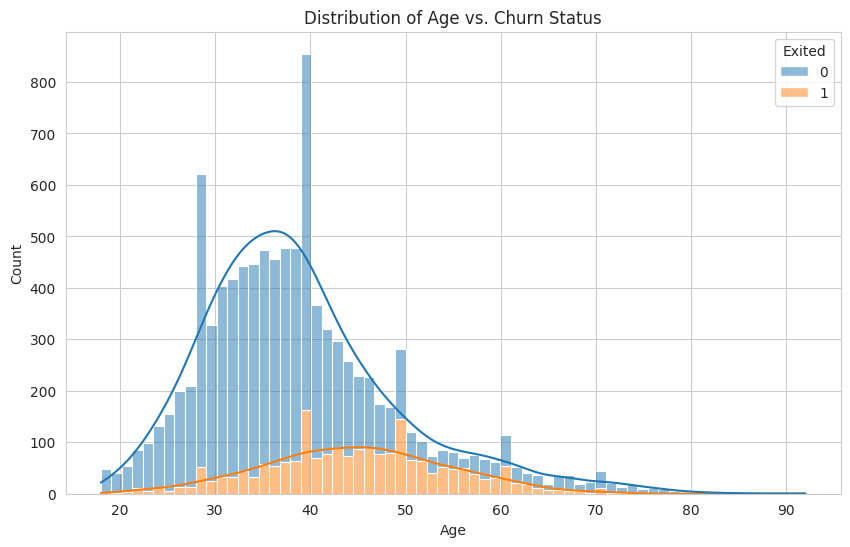

In [51]:
# กราฟที่ 2: การกระจายตัวของ Age เทียบกับ Churn
# (นี่คือ histplot ซึ่งเป็นการซ้อนกัน (stack) การใส่ตัวเลขจะอ่านยาก)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, multiple="stack")
plt.title('Distribution of Age vs. Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

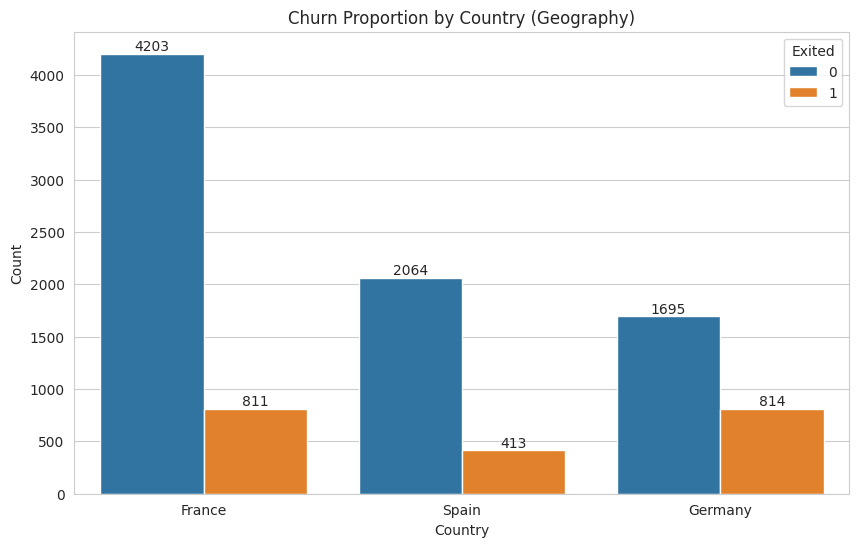

In [52]:
# กราฟที่ 3: สัดส่วน Churn ในแต่ละประเทศ (Geography)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Geography', data=df, hue='Exited')
plt.title('Churn Proportion by Country (Geography)')
plt.xlabel('Country')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    # เพิ่มเงื่อนไข if เพื่อไม่แสดงเลข 0 (กรณีแท่งนั้นไม่มีข้อมูล)
    if height > 0:
        ax.annotate(
            f'{height:.0f}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )
plt.show()

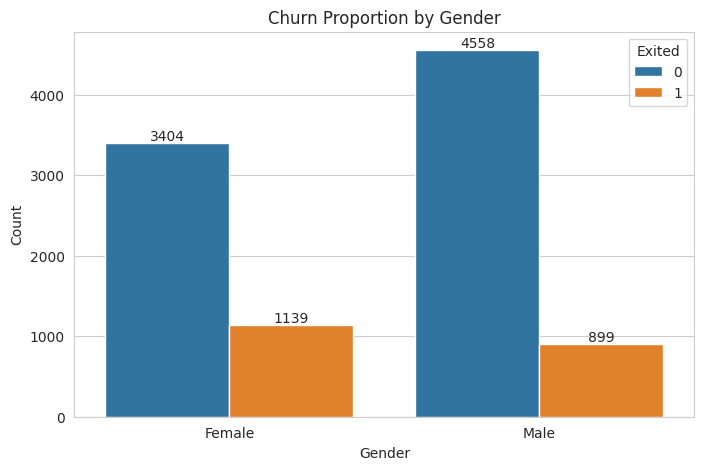

In [53]:
# กราฟที่ 4: สัดส่วน Churn เทียบกับเพศ (Gender)
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Gender', data=df, hue='Exited')
plt.title('Churn Proportion by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:.0f}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )
plt.show()

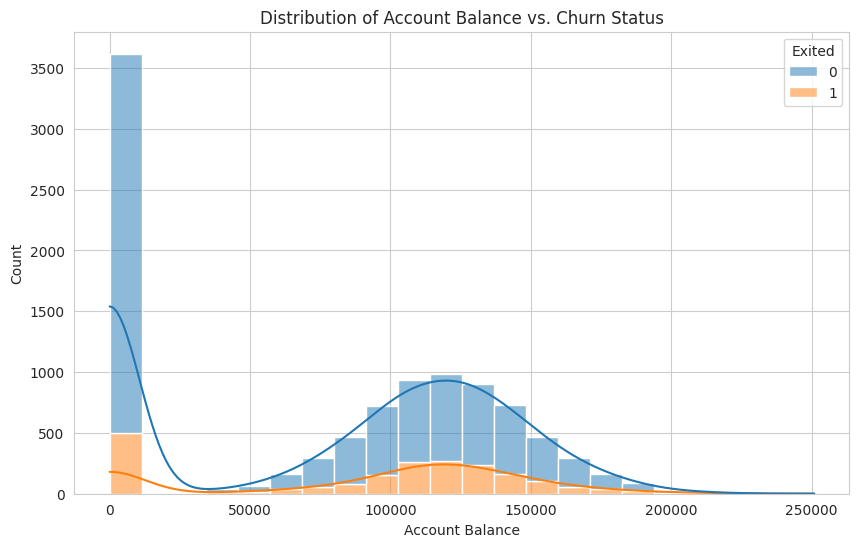

In [54]:
# กราฟที่ 5: การกระจายตัวของ Balance เทียบกับ Churn

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', hue='Exited', kde=True, multiple="stack")
plt.title('Distribution of Account Balance vs. Churn Status')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.show()

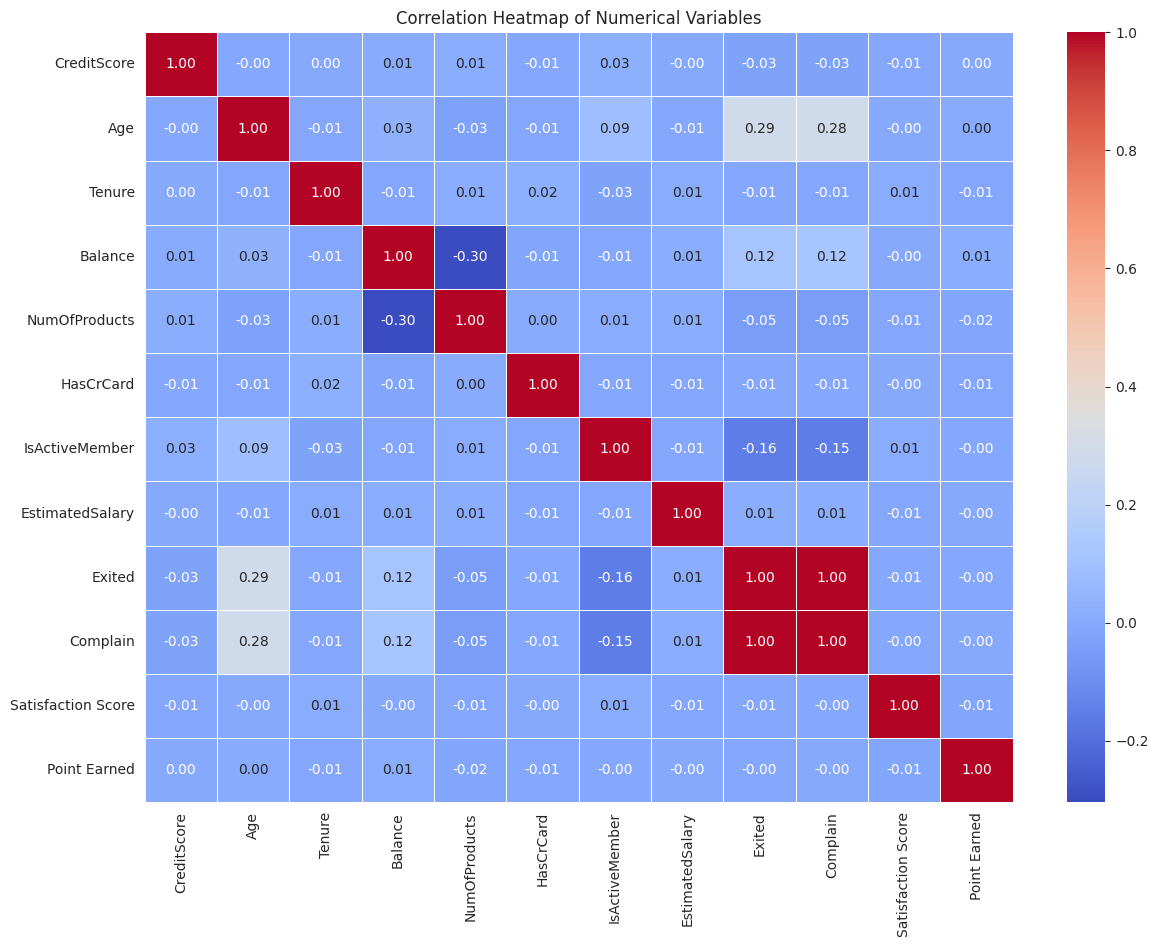

--- จบขั้นตอน EDA ---


In [55]:
# กราฟที่ 6: Correlation Heatmap (เฉพาะคอลัมน์ที่เป็นตัวเลข)
# (Heatmap มีตัวเลขกำกับอยู่แล้วด้วย annot=True)
plt.figure(figsize=(14, 10))
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข (รวม 'Exited' ด้วย)
numerical_cols_for_corr = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
    'Complain', 'Satisfaction Score', 'Point Earned'
]
corr_matrix = df[numerical_cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

print("--- จบขั้นตอน EDA ---")

In [56]:
# --- 4. การเตรียมข้อมูล (Data Preparation & Preprocessing) ---

print("\n--- 4. เริ่มขั้นตอนการเตรียมข้อมูล (Preprocessing) ---")

# ลบคอลัมน์ที่ไม่จำเป็น (ตามแผน)
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print("--- ลบคอลัมน์ที่ไม่จำเป็น (RowNumber, CustomerId, Surname) ---")

# กำหนดตัวแปร X (Features) และ y (Target)
y = df_processed['Exited']
X = df_processed.drop('Exited', axis=1)

# แยกรายชื่อคอลัมน์ที่เป็น Numerical และ Categorical
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned'
]
categorical_features = ['Geography', 'Gender', 'Card Type']

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# แบ่งข้อมูล (Train/Test Split)
# (ทำก่อนการ Scale เพื่อป้องกัน Data Leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # แบ่ง Test 20%
    random_state=42,   # เพื่อให้รันซ้ำได้ผลเดิม
    stratify=y         # ทำให้สัดส่วนของ 0/1 ใน Train/Test เท่ากัน
)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")

# สร้างท่อ (Pipeline) สำหรับ Preprocessing
# (คล้ายกับโค้ดตัวแรก แต่จำเป็นสำหรับขั้นตอนต่อไป)

# 1. ท่อสำหรับ Numerical: ใช้ StandardScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. ท่อสำหรับ Categorical: ใช้ OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. รวมท่อด้วย ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("--- สร้าง Preprocessor (ColumnTransformer) สำเร็จ ---")


--- 4. เริ่มขั้นตอนการเตรียมข้อมูล (Preprocessing) ---
--- ลบคอลัมน์ที่ไม่จำเป็น (RowNumber, CustomerId, Surname) ---
Numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
Categorical features: ['Geography', 'Gender', 'Card Type']
X_train shape: (8000, 14) | X_test shape: (2000, 14)
--- สร้าง Preprocessor (ColumnTransformer) สำเร็จ ---


In [57]:
# --- 5. การสร้างและประเมินผลโมเดล (Model Building & Evaluation) ---

print("\n--- 5. เริ่มเปรียบเทียบโมเดลพื้นฐาน ---")

# 5.1 กำหนดโมเดลที่จะทดสอบ
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

# 5.2 วนลูปเพื่อ Train และ Evaluate ทีละโมเดล
for name, model in models.items():
    print(f"\n--- === กำลังทดสอบ: {name} === ---")

    # สร้าง Pipeline ที่สมบูรณ์ (Preprocessing -> Model)
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # 1. Train โมเดล
    clf_pipeline.fit(X_train, y_train)

    # 2. ทำนายบน Test Set
    y_pred = clf_pipeline.predict(X_test)

    # 3. แสดงผล
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Classification Report:")
    # (เราเน้นดูที่ class '1' (Churn) โดยเฉพาะค่า Recall และ F1-Score)
    print(classification_report(y_test, y_pred, target_names=['Not Churn (0)', 'Churn (1)']))

# (สรุปผล: Random Forest มักจะให้ผลลัพธ์ที่ดีที่สุดสำหรับข้อมูลชุดนี้ โดยเฉพาะเมื่อใช้ class_weight='balanced')


--- 5. เริ่มเปรียบเทียบโมเดลพื้นฐาน ---

--- === กำลังทดสอบ: K-Nearest Neighbors (KNN) === ---
Accuracy: 99.80%
Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       1.00      1.00      1.00      1592
    Churn (1)       1.00      0.99      1.00       408

     accuracy                           1.00      2000
    macro avg       1.00      1.00      1.00      2000
 weighted avg       1.00      1.00      1.00      2000


--- === กำลังทดสอบ: Decision Tree === ---
Accuracy: 99.65%
Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       1.00      1.00      1.00      1592
    Churn (1)       1.00      0.99      0.99       408

     accuracy                           1.00      2000
    macro avg       1.00      0.99      0.99      2000
 weighted avg       1.00      1.00      1.00      2000


--- === กำลังทดสอบ: Random Forest === ---
Accuracy: 99.85%
Classification Report:
               precision    reca

In [58]:
# --- 6. การปรับแต่งโมเดล (Hyperparameter Tuning) ---
# เราจะเลือก Random Forest มาทำการ Tuning

print("\n--- 6. เริ่มการทำ Hyperparameter Tuning (GridSearchCV) ---")
print("--- (เลือกโมเดล Random Forest) ---")

# สร้าง Pipeline ของ Random Forest อีกครั้ง (เพื่อใช้ใน GridSearchCV)
# (ต้องตั้งชื่อ step ให้ชัดเจน เช่น 'classifier')
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# กำหนดค่า Parameter ที่จะทดลอง (Param Grid)
# (ข้อควรระวัง: หากกำหนดเยอะไปจะใช้เวลารันนานมาก)
# (ชื่อ key ต้องเป็น 'ชื่อstep__ชื่อparameter' เช่น 'classifier__n_estimators')
param_grid = {
    'classifier__n_estimators': [100, 150],  # จำนวนต้นไม้
    'classifier__max_depth': [10, 20],      # ความลึกสูงสุดของต้นไม้
    'classifier__min_samples_leaf': [1, 5]     # จำนวน sample ขั้นต่ำที่ใบ
}

# สร้าง GridSearchCV
# cv=3: แบ่งข้อมูล Train เป็น 3 ส่วน (Cross-validation)
# scoring='f1': ใช้วัดผลด้วย F1-Score (เหมาะกับ Imbalanced Data มากกว่า Accuracy)
# n_jobs=-1: ใช้ CPU ทุก Core เพื่อช่วยให้เร็วขึ้น
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1 # แสดง Log การทำงาน
)

# เริ่มการ Search หา Parameter ที่ดีที่สุด (ใช้ X_train, y_train)
print("--- กำลัง Fit GridSearchCV (อาจใช้เวลาสักครู่) ---")
grid_search.fit(X_train, y_train)

# แสดงผล Parameter ที่ดีที่สุด
print("\n--- Tuning สำเร็จ ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1-Score (from CV): {grid_search.best_score_:.4f}")


--- 6. เริ่มการทำ Hyperparameter Tuning (GridSearchCV) ---
--- (เลือกโมเดล Random Forest) ---
--- กำลัง Fit GridSearchCV (อาจใช้เวลาสักครู่) ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Tuning สำเร็จ ---
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Best F1-Score (from CV): 0.9966



--- 7. ประเมินผล 'Best Model' บน Test Set ---
Final Test Accuracy: 99.85%

Final Classification Report (Best Model):
               precision    recall  f1-score   support

Not Churn (0)       1.00      1.00      1.00      1592
    Churn (1)       1.00      1.00      1.00       408

     accuracy                           1.00      2000
    macro avg       1.00      1.00      1.00      2000
 weighted avg       1.00      1.00      1.00      2000


--- Confusion Matrix (Best Model) ---


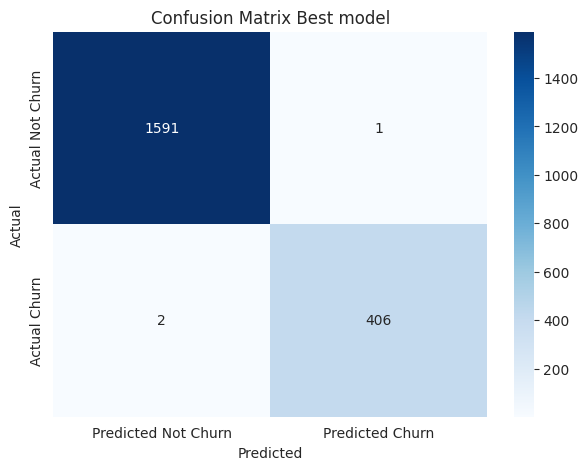

In [59]:
# --- 7. การประเมินผลโมเดลที่ดีที่สุด (Final Evaluation) ---

print("\n--- 7. ประเมินผล 'Best Model' บน Test Set ---")

# โมเดลที่ดีที่สุดจะถูกเก็บไว้ใน .best_estimator_
best_model = grid_search.best_estimator_

# นำโมเดลที่ดีที่สุดไปทำนาย Test Set
y_pred_final = best_model.predict(X_test)

# แสดงผลลัพธ์สุดท้าย
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred_final) * 100:.2f}%")
print("\nFinal Classification Report (Best Model):")
print(classification_report(y_test, y_pred_final, target_names=['Not Churn (0)', 'Churn (1)']))

print("\n--- Confusion Matrix (Best Model) ---")
cm = confusion_matrix(y_test, y_pred_final)
# แสดง Confusion Matrix ด้วย Seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'])
plt.title('Confusion Matrix Best model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
# --- 8. ตัวอย่างการนำไปใช้ (Example Usage) ---

print("\n--- 8. ตัวอย่างการทำนายข้อมูลใหม่ ---")

# สร้างข้อมูลลูกค้าใหม่ (ต้องอยู่ในรูปแบบ DataFrame)
# (ลูกค้าที่มีแนวโน้ม Churn สูง: อยู่ Germany, Active น้อย, มีการ Complain)
new_customer_data = {
    'CreditScore': [100000],
    'Geography': ['Germany'],
    'Gender': ['Male'],
    'Age': [30],
    'Tenure': [2],
    'Balance': [100000],
    'NumOfProducts': [10],
    'HasCrCard': [1],
    'IsActiveMember': [30],
    'EstimatedSalary': [0],
    'Complain': [0],
    'Satisfaction Score': [1],
    'Card Type': ['PLATINUM'],
    'Point Earned': [100000000]
}

# แปลง dict เป็น DataFrame
new_customer_df = pd.DataFrame(new_customer_data)
print("ข้อมูลลูกค้าใหม่:")
print(new_customer_df.T)

# ใช้โมเดลที่ดีที่สุด (best_model) ในการทำนาย
# Pipeline (ที่อยู่ใน best_model) จะ Preprocess ข้อมูลนี้ให้เองอัตโนมัติ
prediction_result = best_model.predict(new_customer_df)
prediction_proba = best_model.predict_proba(new_customer_df)

print("\n--- ผลการทำนาย ---")
churn_status = "Churn (เลิกใช้บริการ)" if prediction_result[0] == 1 else "Not Churn (ไม่เลิกใช้บริการ)"
print(f"ผลการทำนาย: {prediction_result[0]} ({churn_status})")

# แสดงความน่าจะเป็น
print(f"ความน่าจะเป็น (ไม่เลิกใช่บริการ): {prediction_proba[0][0]:.4f}")
print(f"ความน่าจะเป็น (เลิกใช้บริการ): {prediction_proba[0][1]:.4f}")


--- 8. ตัวอย่างการทำนายข้อมูลใหม่ ---
ข้อมูลลูกค้าใหม่:
                            0
CreditScore            100000
Geography             Germany
Gender                   Male
Age                        30
Tenure                      2
Balance                100000
NumOfProducts              10
HasCrCard                   1
IsActiveMember             30
EstimatedSalary             0
Complain                    0
Satisfaction Score          1
Card Type            PLATINUM
Point Earned        100000000

--- ผลการทำนาย ---
ผลการทำนาย: 0 (Not Churn (ไม่เลิกใช้บริการ))
ความน่าจะเป็น (ไม่เลิกใช่บริการ): 0.7519
ความน่าจะเป็น (เลิกใช้บริการ): 0.2481
